In [31]:
import pandas as pd

df = pd.read_csv("04 - Elo Space/College_Football_Elo_Rankings.csv")
df.head(15)

,Unnamed: 0,week,season,Team,opponent,code,date,Result,OT,OT_num,...,SOS,GC,AVGWP,AP_rank,opponent_rank,rank_change,full_date_str,game_date,sept_1_date,Team_Elo_Rating
0,2261,2,2021,Fresno State,Oregon,278,"Sat, Sep 4",L,False,NaN,...,95,37,19,NaN,11.0,NaN,"Sep 4, 2021",2021-09-04,2021-09-01,1466.728935
1,2266,2,2021,Illinois,UTSA,356,"Sat, Sep 4",L,False,NaN,...,53,60,82,NaN,NaN,0.0,"Sep 4, 2021",2021-09-04,2021-09-01,1466.728935
2,2282,2,2021,New Mexico State,San Diego State,166,"Sat, Sep 4",L,False,NaN,...,55,118,117,NaN,NaN,0.0,"Sep 4, 2021",2021-09-04,2021-09-01,1452.888976
3,2296,2,2021,San Jose State,USC,23,"Sat, Sep 4",L,False,NaN,...,123,114,101,NaN,14.0,NaN,"Sep 4, 2021",2021-09-04,2021-09-01,1452.000000
4,2313,2,2021,UCLA,LSU,26,"Sat, Sep 4",W,False,NaN,...,76,41,36,16.0,NaN,-10.0,"Sep 4, 2021",2021-09-04,2021-09-01,1539.758506
5,2247,2,2021,Boise State,UTEP,68,"Fri, Sep 10",W,False,NaN,...,82,36,29,NaN,NaN,0.0,"Sep 10, 2021",2021-09-10,2021-09-01,1583.064640
6,2253,2,2021,Coastal Carolina,Kansas,324,"Fri, Sep 10",W,False,NaN,...,130,47,5,19.0,NaN,NaN,"Sep 10, 2021",2021-09-10,2021-09-01,1548.000000
7,2269,2,2021,Kansas,Coastal Carolina,2305,"Fri, Sep 10",L,False,NaN,...,34,95,123,NaN,19.0,NaN,"Sep 10, 2021",2021-09-10,2021-09-01,1416.935360
8,2693,3,2021,UTEP,Boise State,2638,"Fri, Sep 10",L,False,NaN,...,120,90,64,NaN,NaN,0.0,"Sep 10, 2021",2021-09-10,2021-09-01,1452.000000
9,2239,2,2021,Air Force,Navy,2005,"Sat, Sep 11",W,False,NaN,...,110,24,6,NaN,NaN,NaN,"Sep 11, 2021",2021-09-11,2021-09-01,1580.084861


In [33]:
def clean_team_name(name):
    if pd.isna(name):
        return name
    return (
        name.strip()
            .lower()
            .replace('.', '')
            .replace('&', 'and')
            .replace('st ', 'state ')
            .replace('univ', 'university')
    )

df['Team'] = df['Team'].apply(clean_team_name)
df['opponent'] = df['opponent'].apply(clean_team_name)


In [34]:
opp_elo = df[['Team', 'season', 'week', 'Team_Elo_Rating']].rename(
    columns = {'Team':'opponent', 'Team_Elo_Rating':'Opponent_Elo_Rating'})

df = df.merge(opp_elo, on = ['opponent', 'season', 'week'], how = 'left')

df.head()

,Unnamed: 0,week,season,Team,opponent,code,date,Result,OT,OT_num,...,AVGWP,AP_rank,opponent_rank,rank_change,full_date_str,game_date,sept_1_date,Team_Elo_Rating,prev_ap_rank,Opponent_Elo_Rating
0,2261,2,2021,fresno state,oregon,278,"Sat, Sep 4",L,False,NaN,...,19,NaN,11.0,NaN,"Sep 4, 2021",2021-09-04,2021-09-01,1466.728935,NaN,1562.269367
1,2266,2,2021,illinois,utsa,356,"Sat, Sep 4",L,False,NaN,...,82,NaN,NaN,NaN,"Sep 4, 2021",2021-09-04,2021-09-01,1466.728935,NaN,NaN
2,2282,2,2021,new mexico state,san diego state,166,"Sat, Sep 4",L,False,NaN,...,117,NaN,NaN,NaN,"Sep 4, 2021",2021-09-04,2021-09-01,1452.888976,NaN,1588.641994
3,2296,2,2021,san jose state,usc,23,"Sat, Sep 4",L,False,NaN,...,101,NaN,14.0,NaN,"Sep 4, 2021",2021-09-04,2021-09-01,1452.000000,NaN,1465.431045
4,2313,2,2021,ucla,lsu,26,"Sat, Sep 4",W,False,NaN,...,36,16.0,NaN,NaN,"Sep 4, 2021",2021-09-04,2021-09-01,1539.758506,NaN,NaN


In [39]:
df['margin'] = df['points_scored'] - df['points_allowed']
df['is_win'] = (df['points_scored'] > df['points_allowed']).astype(int)
df['home_bool'] = df['home_game'].astype(int)
df['prev_ap_rank'] = df.groupby(['Team', 'season'])['AP_rank'].shift(1)
df['rank_change'] = df['prev_ap_rank'] - df['AP_rank']

df['win_streak'] = df.groupby(['Team', 'season'])['is_win'].transform(
    lambda x: x.rolling(3, min_periods = 1).sum()
)
df['avg_margin_last3'] = df.groupby(['Team', 'season'])['margin'].transform(
    lambda x: x.rolling(3, min_periods = 1).mean()
)

In [40]:
features = ['previous_ap_rank', 'Team_Elo_Rating', 'Opponent_Elo_Rating',
            'elo_diff', 'is_win', 'margin', 'home_bool', 'win_streak', 
            'avg_margin_last3']

y = df['rank_change']

In [41]:
train = df[df['season'] < 2024]
test = df[df['season'] == 2024]
X_train, y_train = train[features], train['rank_change']
X_test, y_test = test[features], test['rank_change']

KeyError: "['previous_ap_rank', 'elo_diff'] not in index"

In [2]:
import pandas as pd

df = pd.read_csv("04 - Elo Space/College_Football_Elo_Rankings.csv")
print(df.shape)
print(df.columns)
print(df.head(5))

(5599, 30)
Index(['Unnamed: 0', 'week', 'season', 'Team', 'opponent', 'code', 'date',
       'Result', 'OT', 'OT_num', 'pass', 'rush', 'rec', 'points_allowed',
       'points_scored', 'point_differential', 'home_game', 'CONF', 'SOR',
       'FPI', 'SOS', 'GC', 'AVGWP', 'AP_rank', 'opponent_rank', 'rank_change',
       'full_date_str', 'game_date', 'sept_1_date', 'Team_Elo_Rating'],
      dtype='object')
   Unnamed: 0  week  season              Team         opponent  code  \
0        2261     2    2021      Fresno State           Oregon   278   
1        2266     2    2021          Illinois             UTSA   356   
2        2282     2    2021  New Mexico State  San Diego State   166   
3        2296     2    2021    San Jose State              USC    23   
4        2313     2    2021              UCLA              LSU    26   

         date Result     OT OT_num  ...  SOS   GC  AVGWP  AP_rank  \
0  Sat, Sep 4      L  False    NaN  ...   95   37     19      NaN   
1  Sat, Sep 4      L  

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import joblib

# Load data
df = pd.read_csv("04 - Elo Space/College_Football_Elo_Rankings.csv")

# Drop rows missing the target or key game stats
df = df.dropna(subset=["rank_change", "points_scored", "points_allowed", "Team_Elo_Rating"])

# Define features and target
features = [
    "Team", "opponent", "home_game", "points_scored", "points_allowed",
    "point_differential", "AP_rank", "opponent_rank", "Team_Elo_Rating"
]
X = df[features]
y = df["rank_change"]

# Identify categorical and numeric columns
categorical = ["Team", "opponent", "home_game"]
numeric = [col for col in features if col not in categorical]

# Preprocessing pipeline with imputers
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric),
        ("cat", categorical_transformer, categorical)
    ]
)

# Full pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=300, random_state=42))
])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Evaluate
preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))

# Save trained model
joblib.dump(model, "ap_rank_change_model.pkl")


MAE: 0.780951503990178


['ap_rank_change_model.pkl']

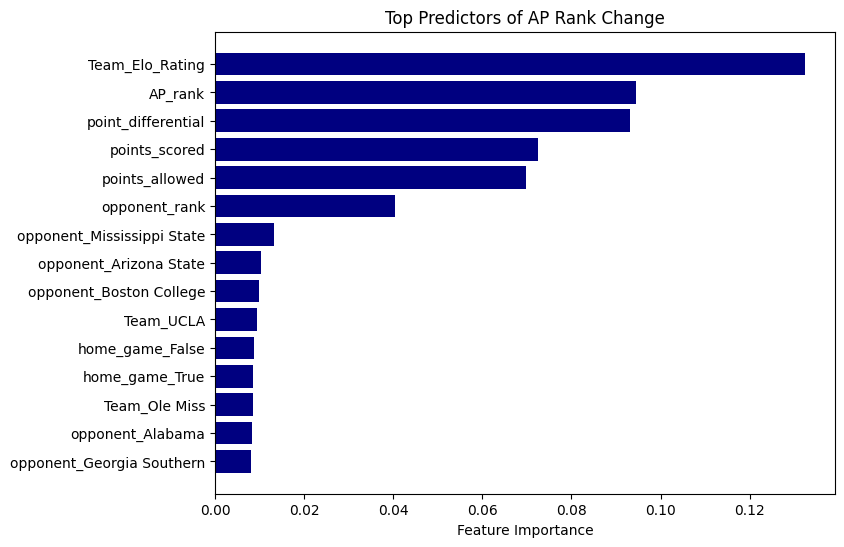